In [1]:
import os


import pandas as pd
import numpy as np
# import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from plot_feature1 import *
from plot_transient import *
from plot_feature1 import *
from plot_feature2 import *
from myMedFilter import *
from myHeatMap import *
from myScatter import *
from linearRegression import *

In [2]:
# define local directions
file_forder = "./transient_timeDomain/" 
up_dir = "./up_edge/"
down_dir = "./down_edge/"
up_pic_dir = "./up_edge_pic/"
down_pic_dir = "./down_edge_pic/"
PLOT_TRANSIENT = False
PLOT_FEATURE = True
DROP_OUTLIERS = True

# slice data while switching 
### 1. up-edge 
### 2. down-edge

In [32]:
# slice data
PLOT_TRANSIENT = False
for (_ ,_ , process_files) in os.walk(file_forder):
    for file in process_files:
        sample_df = pd.read_csv(file_forder + file )
        sample_name = file[:-4]
        # get index in up and down edge
        n = np.where(sample_df.gateSignalVoltage.values>8)  # return a tuple so use n[0][0] to index
        # slice data
        up_df = sample_df.iloc[n[0][0]-100:n[0][0]+924,:]
        down_df = sample_df.iloc[n[0][-1]-100:n[0][-1]+924,:]
        # save data
        up_df.to_csv(up_dir+file,index = False)
        down_df.to_csv(down_dir+file,index = False)
        # plot data
        if PLOT_TRANSIENT:
            plot_transient(down_df,sample_name, down_pic_dir)
            plot_transient(up_df,sample_name,up_pic_dir)

# show info
# print(sample_df.shape)
# print(sample_df.columns)
# sample_df.head()

# featuring

### extract features

In [3]:
# define local directions
up_dir = "./up_edge/"
down_dir = "./down_edge/"

# down edge
all_feature_df = pd.DataFrame()
for (_ ,_ , process_files) in os.walk(down_dir):
    for file in process_files:
        # read file
        sample_df = pd.read_csv(down_dir+file)
        # drop some cols and expand feature P
        sample_df = sample_df.drop(["collectorEmitterCurrentSingal","gateSignalVoltage"],axis = 1)
        sample_df["P"] = sample_df["gateEmitterVoltage"]*sample_df["collectorEmitterVoltage"]
        # sample_df["P_diff"] = sample_df["P"].diff()
        # sample_df["gateEmitterVoltage_diff"] = sample_df["gateEmitterVoltage"].diff()
        sample_df.fillna(method = "backfill",inplace = True)
        # calculate features
        cols = sample_df.columns
        feature_df = pd.DataFrame()
        for col in cols:
            df = cal_feature(sample_df, col)
            feature_df = pd.concat([feature_df,df],axis = 1)
        feature_df["Vce_pre"] = np.mean(sample_df['collectorEmitterVoltage'].values[:60])
        feature_df["P_pre"] = np.mean(sample_df['P'].values[:60])
        feature_df['round'] = int(file[0:-4])
        
        all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.sort_values(by = 'round', inplace=True)    
all_feature_df.to_csv('./temp/down_edge_features.csv',index = False)

# up edge
all_feature_df = pd.DataFrame()
for (_ ,_ , process_files) in os.walk(up_dir):
    for file in process_files:
        # read file
        sample_df = pd.read_csv(up_dir+file)
        # drop some cols and expand feature P
        sample_df = sample_df.drop(["collectorEmitterCurrentSingal","gateSignalVoltage"],axis = 1)
        sample_df["P"] = sample_df["gateEmitterVoltage"]*sample_df["collectorEmitterVoltage"]
        # sample_df["P_diff"] = sample_df["P"].diff()
        # sample_df["gateEmitterVoltage_diff"] = sample_df["gateEmitterVoltage"].diff()
        sample_df.fillna(method = "backfill",inplace = True)
        # calculate features
        cols = sample_df.columns
        feature_df = pd.DataFrame()
        for col in cols:
            df = cal_feature(sample_df, col)
            feature_df = pd.concat([feature_df,df],axis = 1)
        feature_df["Vce_post"] = np.mean(sample_df['collectorEmitterVoltage'].values[-60:])
        feature_df["P_post"] = np.mean(sample_df['P'].values[-60:])
        feature_df['round'] = int(file[0:-4])
        
        all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.sort_values(by = 'round', inplace=True)    
all_feature_df.to_csv('./temp/up_edge_features.csv',index = False)

print(all_feature_df.shape)
all_feature_df.head()

(418, 81)


,gateEmitterVoltage_min,gateEmitterVoltage_max,gateEmitterVoltage_range,gateEmitterVoltage_mean,gateEmitterVoltage_mode,gateEmitterVoltage_median,gateEmitterVoltage_quantile25,gateEmitterVoltage_quantile75,gateEmitterVoltage_std,gateEmitterVoltage_var,...,P_sf,P_MI,P_CF,P_llr,P_pi,P_sdif,P_cpt1,Vce_post,P_post,round
0,-0.390625,10.000000,10.390626,7.579727,9.84375,9.062500,6.562500,9.765625,3.074208,9.450753,...,1.058054,1.411990,1.239247,1.384825,1.246358,0.362813,1.334079,3.205208,31.635012,1
0,-0.390625,10.078125,10.468751,7.554245,9.84375,9.218750,5.859375,9.765625,3.152836,9.940375,...,1.057140,1.505056,1.327339,1.474003,1.327593,0.363865,1.413456,2.145833,21.251420,2
0,-0.312500,10.078125,10.390626,7.543564,9.84375,9.296875,5.703125,9.843750,3.185942,10.150229,...,1.062070,1.536078,1.342179,1.445854,1.368513,0.375270,1.465291,2.101562,20.814408,3
0,-0.312500,10.078125,10.390626,7.544861,9.84375,9.335938,5.761719,9.843750,3.213306,10.325338,...,1.066235,1.568030,1.363964,1.427435,1.394029,0.389463,1.491969,2.096354,20.814001,4
0,-0.312500,10.078125,10.390626,7.516327,9.84375,9.296875,5.859375,9.765625,3.211524,10.313888,...,1.069713,1.498530,1.297180,1.405000,1.330021,0.399317,1.425516,2.198959,21.737551,5


### conband the up and down features

In [5]:
# conband the up and down features
up_df = pd.read_csv('./temp/up_edge_features.csv')
down_df = pd.read_csv('./temp/down_edge_features.csv')
up_cols = ['up_'+c for c in up_df.columns]
down_cols = ['down_'+c for c in down_df.columns]
up_df.columns = up_cols
down_df.columns = down_cols
up_df['round'] = up_df['up_round']
up_df.drop(['up_round'],axis = 1,inplace = True)
down_df['round'] = down_df['down_round']
down_df.drop(['down_round'],axis = 1,inplace = True)
train_df = pd.merge(up_df,down_df, how="left",on = "round" )

train_df.to_csv("./temp/train_feature_df.csv",index = False)
print(train_df.shape)
train_df.head()

(418, 161)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_I,down_P_sf,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre
0,-0.390625,10.000000,10.390626,7.579727,9.84375,9.062500,6.562500,9.765625,3.074208,9.450753,...,5.536384,1.932469,17.506551,3.075860,0.381431,5.578801,1.658998,16.306011,4.485417,44.106609
1,-0.390625,10.078125,10.468751,7.554245,9.84375,9.218750,5.859375,9.765625,3.152836,9.940375,...,6.771506,1.810763,12.282750,3.874044,0.565126,7.907235,1.596240,11.856450,2.031250,19.938147
2,-0.312500,10.078125,10.390626,7.543564,9.84375,9.296875,5.703125,9.843750,3.185942,10.150229,...,6.143895,1.776614,11.295554,3.601538,0.566574,7.097310,1.552203,10.846015,1.979166,19.494014
3,-0.312500,10.078125,10.390626,7.544861,9.84375,9.335938,5.761719,9.843750,3.213306,10.325338,...,5.544050,1.746579,10.048359,3.294469,0.573574,6.389936,1.516581,9.681631,1.955729,19.177852
4,-0.312500,10.078125,10.390626,7.516327,9.84375,9.296875,5.859375,9.765625,3.211524,10.313888,...,5.107612,1.705486,9.061933,3.122988,0.590179,5.951248,1.474526,8.690010,1.992709,19.579592


### add temperature 

In [10]:
# add temperature
train_df = pd.read_csv('./temp/train_feature_df.csv')
tempareture_df = pd.read_csv("collectorEmitterVoltage_peak_temperature.csv")
train_df["temperature"] = tempareture_df["tempareture"]
# change the target num
train_df["num_cycle"] = train_df["round"]
train_df.drop(['round'],axis = 1, inplace = True)

train_df.to_csv("./temp/train_feature_df.csv",index = False)

print(train_df.shape)
train_df.head()

(418, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
0,-0.390625,10.000000,10.390626,7.579727,9.84375,9.062500,6.562500,9.765625,3.074208,9.450753,...,17.506551,3.075860,0.381431,5.578801,1.658998,16.306011,4.485417,44.106609,47.211104,1
1,-0.390625,10.078125,10.468751,7.554245,9.84375,9.218750,5.859375,9.765625,3.152836,9.940375,...,12.282750,3.874044,0.565126,7.907235,1.596240,11.856450,2.031250,19.938147,124.804264,2
2,-0.312500,10.078125,10.390626,7.543564,9.84375,9.296875,5.703125,9.843750,3.185942,10.150229,...,11.295554,3.601538,0.566574,7.097310,1.552203,10.846015,1.979166,19.494014,178.408544,3
3,-0.312500,10.078125,10.390626,7.544861,9.84375,9.335938,5.761719,9.843750,3.213306,10.325338,...,10.048359,3.294469,0.573574,6.389936,1.516581,9.681631,1.955729,19.177852,215.428544,4
4,-0.312500,10.078125,10.390626,7.516327,9.84375,9.296875,5.859375,9.765625,3.211524,10.313888,...,9.061933,3.122988,0.590179,5.951248,1.474526,8.690010,1.992709,19.579592,244.451166,5


# drop outliers

In [17]:
PLOT_FEATURE = True
DROP_OUTLIERS = True
# drop outl
round_num_del = [1,2,3,4,5,6,7,8,9,10,11,12,13,24,35,46,112,223,334,386,375,364,
                 56,153,208,309,327,347,351,360,365,391
                ]
round_num_del = [i-1 for i in round_num_del]

train_df = pd.read_csv('./temp/train_feature_df.csv')
if DROP_OUTLIERS:
    train_df.drop(round_num_del,axis = 0,inplace = True)
train_df = train_df.loc[train_df['temperature']>326,:]
if PLOT_FEATURE:
    plot_feature1(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

(383, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
16,-0.312500,10.078125,10.390626,7.571411,9.921875,9.296875,6.093750,9.843750,3.230866,10.438495,...,7.082485,2.602792,0.613127,4.653466,1.386011,6.704661,1.761459,17.318769,329.912613,17
17,-0.312500,10.000000,10.312501,7.563477,9.843750,9.296875,6.171875,9.843750,3.218829,10.360859,...,7.041753,2.643536,0.621442,4.795571,1.389989,6.664034,1.744792,17.132653,327.237079,18
18,-0.390625,10.078125,10.468751,7.568054,9.843750,9.296875,6.093750,9.843750,3.213205,10.324686,...,7.602344,2.694111,0.598239,4.909201,1.419362,7.209119,1.800000,17.695559,326.213509,19
19,-0.312500,10.078125,10.390626,7.554245,9.843750,9.296875,6.152344,9.843750,3.226909,10.412941,...,7.092166,2.647209,0.619070,4.804312,1.390806,6.721554,1.792709,17.567467,329.365197,20
20,-0.312500,10.000000,10.312501,7.544480,9.843750,9.296875,6.093750,9.765625,3.214172,10.330903,...,7.221309,2.678015,0.616027,4.870474,1.397366,6.840184,1.781250,17.464521,328.195866,21


## filter

In [18]:
PLOT_FEATURE = True
# filter
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df.drop(round_num_del,axis = 0,inplace = True)
cols = [c for c in train_df.columns if c!="round"]
for c in cols:
    train_df[c] = myMedFilter(train_df[c].values)
if PLOT_FEATURE:
    plot_feature2(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers_filter.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

(386, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
13,-0.3125,10.078125,10.390626,7.574158,9.84375,9.296875,6.152344,9.84375,3.221430,10.377609,...,7.602061,2.715831,0.601241,4.870076,1.399963,7.214460,1.748959,17.232425,324.270022,14
14,-0.3125,10.078125,10.390626,7.571411,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.558117,2.715831,0.606585,4.870076,1.399722,7.176176,1.748959,17.232425,324.270022,15
15,-0.3125,10.078125,10.390626,7.571411,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.129333,2.643536,0.613127,4.795571,1.392261,6.757662,1.748959,17.232425,325.316266,16
16,-0.3125,10.078125,10.390626,7.568054,9.84375,9.296875,6.093750,9.84375,3.216108,10.343349,...,7.129333,2.643536,0.613127,4.795571,1.392261,6.757662,1.759375,17.236738,326.213509,17
17,-0.3125,10.078125,10.390626,7.568054,9.84375,9.296875,6.152344,9.84375,3.218829,10.360859,...,7.092166,2.643536,0.615751,4.795571,1.390806,6.721554,1.761459,17.318769,327.237079,18


# correlation

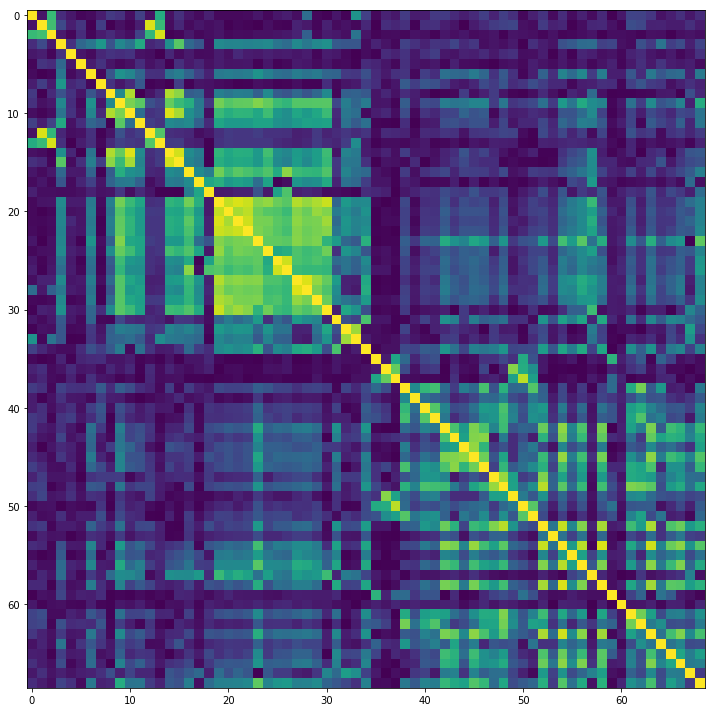

In [55]:
# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers_filter.csv')
train_df.drop(del_cols,axis = 1,inplace= True)
corr_df = train_df.corr().abs()
corr_df.to_csv("temp/coelationship_outliners.csv")
# plot
im =np.abs(corr_df.values) 
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.tight_layout()
plt.savefig('temp/correlationship'+'.png')


# feature select

In [61]:
# calculate corr
# train_df = pd.read_csv('./temp/train_feature_df.csv')
train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers_filter.csv')
corr_df = train_df.corr().abs()

# collect the duplicate cols
cols = train_df.columns.values
del_cols = []
for i in range(cols.size):
    for j in range(i+1,cols.size,1):
        if(corr_df.iloc[i,j]>0.98):
            if(cols[j] not in del_cols):
                del_cols.append(cols[j])
print("length of delete cols:",len(del_cols))

train_df.drop(del_cols,axis = 1,inplace= True)
corr_df = train_df.corr().abs()
corr_df.sort_values(by = 'num_cycle',axis = 0, ascending=False, inplace = True)
l = corr_df.index.to_series()
x = corr_df.loc[:,'num_cycle']>0.6
cols = l[x].values
print("feature length:",len(cols)-1)
print(cols)
corr_df.head()

length of delete cols: 73
feature length: 20
['num_cycle' 'up_collectorEmitterVoltage_llr'
 'up_collectorEmitterVoltage_std' 'down_P_mean'
 'down_collectorEmitterVoltage_max' 'down_gateEmitterVoltage_kurt'
 'down_P_sf' 'down_P_max' 'down_P_quantile75' 'down_P_MI'
 'down_gateEmitterVoltage_mad' 'down_P_I' 'down_gateEmitterVoltage_msv'
 'down_gateEmitterVoltage_quantile75'
 'down_collectorEmitterVoltage_quantile75' 'down_gateEmitterVoltage_sdif'
 'up_gateEmitterVoltage_skew' 'up_collectorEmitterVoltage_sf'
 'down_collectorEmitterVoltage_median' 'down_gateEmitterVoltage_std'
 'down_gateEmitterVoltage_sra']


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_skew,...,down_P_quantile75,down_P_sra,down_P_I,down_P_sf,down_P_MI,down_P_CF,down_P_pi,down_Vce_pre,temperature,num_cycle
num_cycle,0.127123,0.074596,0.036069,0.201880,0.141684,0.030214,0.405321,0.096349,0.113328,0.620235,...,0.704940,0.242232,0.673594,0.718767,0.693717,0.560318,0.576118,0.434500,0.170949,1.000000
up_collectorEmitterVoltage_llr,0.063435,0.017215,0.032779,0.406541,0.054074,0.019843,0.507662,0.064742,0.221744,0.734148,...,0.715719,0.350964,0.662875,0.699521,0.683576,0.568244,0.601746,0.581499,0.147000,0.790502
up_collectorEmitterVoltage_std,0.059223,0.002257,0.044143,0.454868,0.067542,0.008518,0.514605,0.041019,0.306179,0.810994,...,0.627020,0.309593,0.561379,0.596985,0.588921,0.479696,0.501416,0.522609,0.001008,0.751653
down_P_mean,0.173499,0.141846,0.019652,0.122527,0.104082,0.035045,0.413624,0.195695,0.017286,0.506212,...,0.937485,0.285043,0.901243,0.973040,0.941842,0.727644,0.771012,0.813968,0.493659,0.745343
down_collectorEmitterVoltage_max,0.126624,0.105723,0.012717,0.246685,0.072309,0.070183,0.448502,0.114782,0.007629,0.535309,...,0.929284,0.450340,0.901999,0.937835,0.917330,0.772894,0.845256,0.827157,0.513761,0.731330


In [107]:
cols = ['down_gateEmitterVoltage_sra',
        'down_gateEmitterVoltage_std',
        'down_collectorEmitterVoltage_median',
        'up_gateEmitterVoltage_skew',
        'down_gateEmitterVoltage_sdif',
        'down_collectorEmitterVoltage_quantile75',
        'down_gateEmitterVoltage_quantile75',
        'down_gateEmitterVoltage_msv',
        'down_P_quantile75',
        'down_gateEmitterVoltage_kurt',
        'down_collectorEmitterVoltage_max',
        'up_collectorEmitterVoltage_std',
        "temperature",
        "num_cycle"
       ]
cols = [
    'num_cycle' ,
     'up_collectorEmitterVoltage_llr',
     'up_collectorEmitterVoltage_std',
     'down_P_mean',
     'down_collectorEmitterVoltage_max',
     'down_gateEmitterVoltage_kurt',
     'down_P_sf',
     'down_P_max' ,
     'down_P_quantile75' ,
     'down_P_MI',
     'down_gateEmitterVoltage_mad' ,
     'down_P_I',
     'down_gateEmitterVoltage_msv',
     'down_gateEmitterVoltage_quantile75',
     'down_collectorEmitterVoltage_quantile75' ,
     'down_gateEmitterVoltage_sdif',
     'up_gateEmitterVoltage_skew' ,
     'up_collectorEmitterVoltage_sf',
     'down_collectorEmitterVoltage_median' ,
     'down_gateEmitterVoltage_std',
     'down_gateEmitterVoltage_sra',
    ]

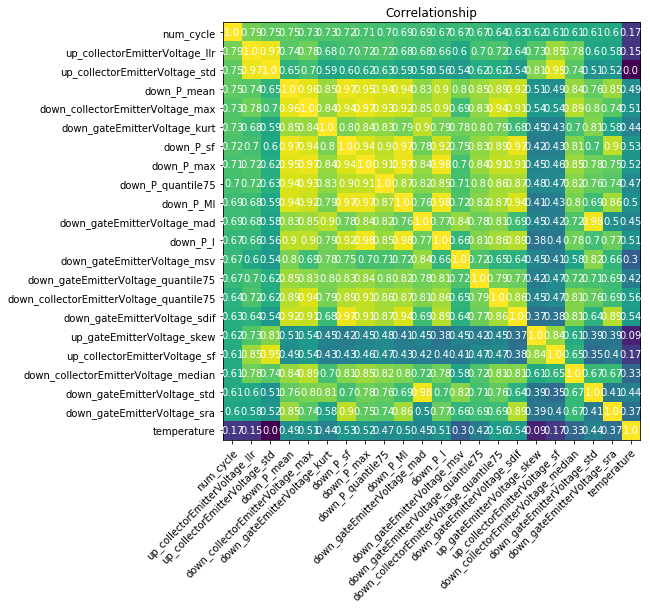

In [7]:
from myHeatMap import *
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')

# train_df = pd.read_csv('./temp/train_feature_df.csv')
# train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
train_df = pd.read_csv('./temp/train_df_scale.csv')
feature_df = train_df.loc[:,cols]
feature_df.to_csv('./temp/useful_feature_df.csv',index = False)
corr_df = feature_df.corr().abs()
corr_df.to_csv("temp/correlationship_usefue_features.csv")
# plot
im =np.abs(corr_df.values) 
im = im.round(2)
myHeatMap(im,cols,cols)

### scale to [0, 1]

In [7]:
# std
# feature_df = pd.read_csv('./temp/useful_feature_df.csv')
target = ["temperature","num_cycle"]
cols_to_use = [c for c in cols if c not in target]
fliter = MinMaxScaler()
for col in cols_to_use:
    feature_df[col] = fliter.fit_transform(feature_df[col].values.reshape(-1, 1))
    
X = feature_df[cols_to_use].values
feature_df.to_csv("temp/train_df_scale.csv",index = False)
feature_df.head()

NameError: name 'MinMaxScaler' is not defined

### dimension recuce

In [4]:
feature_df = pd.read_csv("temp/train_df_scale.csv")
target = ["temperature","num_cycle"]
cols_to_use = [c for c in feature_df.columns.values if c not in target]
X = feature_df[cols_to_use].values

feature_df.head()

,num_cycle,up_collectorEmitterVoltage_llr,up_collectorEmitterVoltage_std,down_P_mean,down_collectorEmitterVoltage_max,down_gateEmitterVoltage_kurt,down_P_sf,down_P_max,down_P_quantile75,down_P_MI,...,down_gateEmitterVoltage_msv,down_gateEmitterVoltage_quantile75,down_collectorEmitterVoltage_quantile75,down_gateEmitterVoltage_sdif,up_gateEmitterVoltage_skew,up_collectorEmitterVoltage_sf,down_collectorEmitterVoltage_median,down_gateEmitterVoltage_std,down_gateEmitterVoltage_sra,temperature
0,17,0.716696,0.519404,0.634215,0.629032,0.210838,0.522472,0.492622,0.641344,0.436961,...,0.801938,0.6,0.37500,0.455757,1.000000,0.745154,0.833333,0.605962,0.439825,329.912613
1,18,0.221619,0.826368,0.526987,0.709677,0.209354,0.476351,0.533485,0.516811,0.416931,...,0.751188,0.6,0.15625,0.436655,0.765671,0.768393,0.666667,0.846119,0.643546,327.237079
2,19,0.305743,0.686036,0.832453,0.951613,0.148879,0.808098,0.790011,0.820672,0.692599,...,0.835834,0.8,0.12500,0.828188,0.602096,0.543115,1.000000,0.885588,0.297975,326.213509
3,20,0.454839,0.714181,0.573270,0.645161,0.237734,0.492321,0.565834,0.642590,0.441721,...,0.634682,0.6,0.50000,0.527420,0.808537,0.830490,0.666667,0.764624,0.574437,329.365197
4,21,0.253959,0.799547,0.643024,0.741935,0.114086,0.553468,0.652667,0.716064,0.505227,...,0.813247,0.8,0.37500,0.563711,0.865340,0.747255,0.833333,0.947072,0.579455,328.195866


In [5]:
from myScatter import *
# PCA
# dimension reduce
pca = decomposition.PCA(n_components = 2)
X_reduce = pca.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/PCA'+'_map.csv',index = False)

    
myScatter(map_df,"PCA")    

NameError: name 'decomposition' is not defined

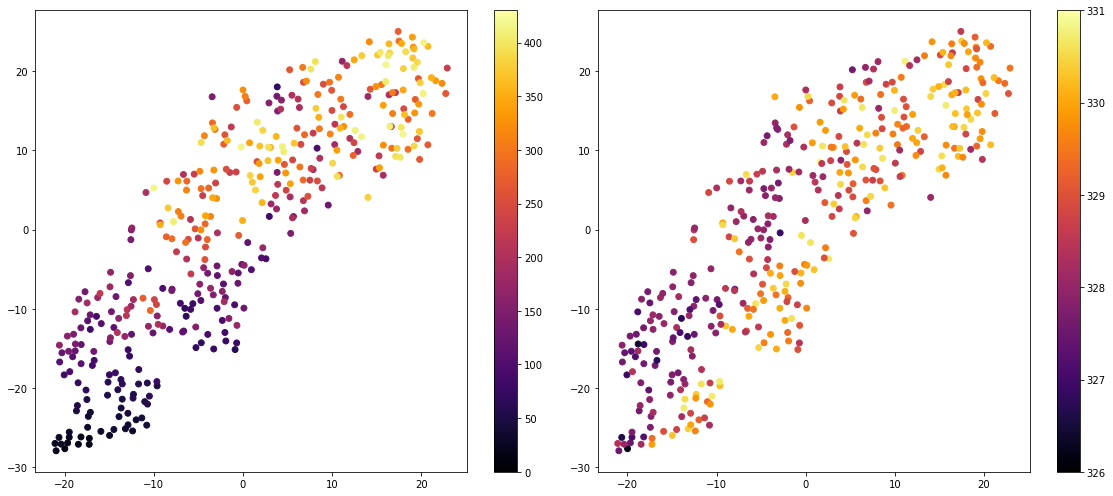

In [69]:
# TSNE
# dimension reduce
tsne = manifold.TSNE(n_components=2, init='random', random_state=1)
X_reduce = tsne.fit_transform(X)
# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/'+'map_'+"TSNE"+'.csv',index = False)
# plot
myScatter(map_df,"TSNE")  

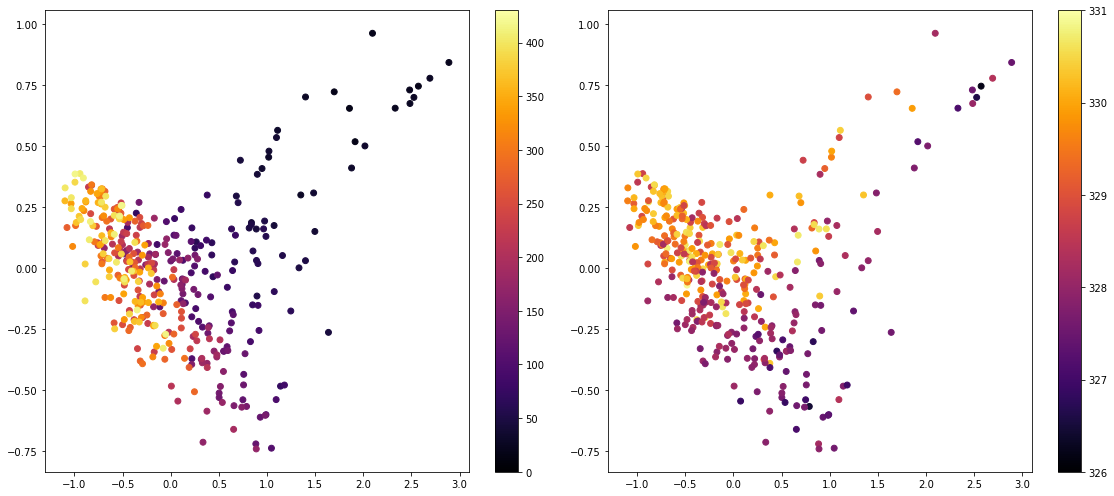

In [71]:
# Isomap
# dimension reduce
Isomap = manifold.Isomap(n_neighbors = 8 , n_components = 2)
X_reduce = Isomap.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['num_cycle'] = feature_df['num_cycle']
map_df['temperature'] = feature_df['temperature']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/'+'map_'+"Isomap"+'.csv',index = False)
# plot
myScatter(map_df,"Isomap")  

In [ ]:
# MDS
# dimension reduce
mds = manifold.MDS(n_components=2)
X_reduce = mds.fit_transform(X)

# SpectralEmbedding
# dimension reduce
se = manifold.SpectralEmbedding(n_components= 2, n_neighbors= 10)
X_reduce = se.fit_transform(X)

### try some Nueral Network

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn


In [5]:
train_df = pd.read_csv( "./temp/train_df_scale.csv")

print(train_df.shape)
train_df.head()

(383, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
0,0.666667,0.5,0.333333,0.367326,1.0,0.0,0.000000,1.0,1.000000,1.000000,...,0.436961,0.365899,0.439893,0.373336,0.479722,0.449392,0.628788,0.632519,329.912613,17
1,0.666667,0.0,0.000000,0.259105,0.0,0.0,0.333333,1.0,0.640345,0.639146,...,0.416931,0.511458,0.556471,0.593242,0.524382,0.429643,0.507576,0.496856,327.237079,18
2,0.333333,0.5,0.666667,0.321540,0.0,0.0,0.000000,1.0,0.472308,0.471010,...,0.692599,0.692140,0.231170,0.769082,0.854109,0.694615,0.909091,0.907166,326.213509,19
3,0.666667,0.5,0.333333,0.133195,0.0,0.0,0.250000,1.0,0.881766,0.881223,...,0.441721,0.524578,0.523214,0.606769,0.533547,0.457604,0.856061,0.813798,329.365197,20
4,0.666667,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.501211,0.499909,...,0.505227,0.634634,0.480555,0.709153,0.607189,0.515272,0.772727,0.738759,328.195866,21


# prepare data

In [62]:
train_df = pd.read_csv( "./temp/train_df_scale.csv")
train_df["temperature"] = (train_df["temperature"] - 326)/5.0
target = ["num_cycle"]
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')
cols = [c for c in cols if c not in target]
print(cols)
# get data
x_train = train_df.loc[:,cols].values
y_train = train_df.loc[:,"num_cycle"].values/100.0
# astype
x_train = torch.tensor(x_train,dtype = torch.float32 )
y_train = torch.tensor(y_train,dtype = torch.float32)
y_train = y_train.unsqueeze_(1)
# split
x_test = x_train[350:]
y_test = y_train[350:]
x_train = x_train[:350]
y_train = y_train[:350]
print("train data size",x_train.shape)
print("train label size",y_train.shape)
print("test data size",x_test.shape)
print("test label size",y_test.shape)

['up_collectorEmitterVoltage_llr', 'up_collectorEmitterVoltage_std', 'down_P_mean', 'down_collectorEmitterVoltage_max', 'down_gateEmitterVoltage_kurt', 'down_P_sf', 'down_P_max', 'down_P_quantile75', 'down_P_MI', 'down_gateEmitterVoltage_mad', 'down_P_I', 'down_gateEmitterVoltage_msv', 'down_gateEmitterVoltage_quantile75', 'down_collectorEmitterVoltage_quantile75', 'down_gateEmitterVoltage_sdif', 'up_gateEmitterVoltage_skew', 'up_collectorEmitterVoltage_sf', 'down_collectorEmitterVoltage_median', 'down_gateEmitterVoltage_std', 'down_gateEmitterVoltage_sra', 'temperature']
train data size torch.Size([350, 21])
train label size torch.Size([350, 1])
test data size torch.Size([33, 21])
test label size torch.Size([33, 1])


In [ ]:
myset = MyDataset(x_train,y_train)
from torch.utils.data import DataLoader
train_loader = DataLoader(myset, batch_size=256, shuffle=True)

use gpu: True
step:[1000], train loss: 1.188509, test loss: 5.681660
step:[2000], train loss: 0.474427, test loss: 2.638799
step:[3000], train loss: 0.274558, test loss: 1.448345
step:[4000], train loss: 0.203454, test loss: 1.009032
step:[5000], train loss: 0.166395, test loss: 0.767926
step:[6000], train loss: 0.145844, test loss: 0.593170
step:[7000], train loss: 0.130763, test loss: 0.459561
step:[8000], train loss: 0.119666, test loss: 0.379470
step:[9000], train loss: 0.110690, test loss: 0.325855
step:[10000], train loss: 0.102264, test loss: 0.284916
step:[11000], train loss: 0.093189, test loss: 0.264634
step:[12000], train loss: 0.073183, test loss: 0.227274
step:[13000], train loss: 0.062021, test loss: 0.162984
step:[14000], train loss: 0.055113, test loss: 0.132842
step:[15000], train loss: 0.047150, test loss: 0.116849
step:[16000], train loss: 0.042237, test loss: 0.101387
step:[17000], train loss: 0.038626, test loss: 0.090928
step:[18000], train loss: 0.035193, test lo

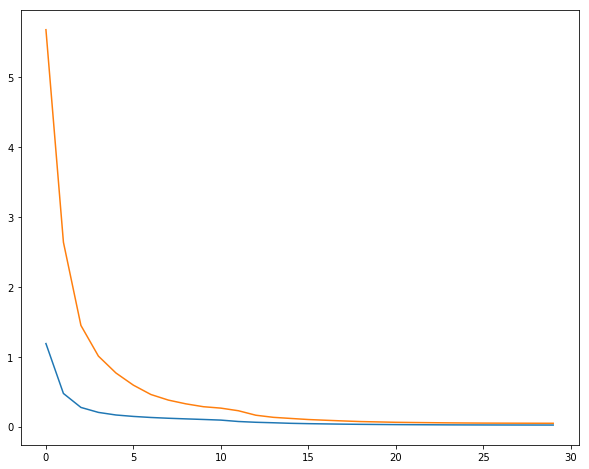

In [64]:
from neuralNetwork2 import *

 # 1. 根据网络层的不同定义不同的初始化方式     
def weight_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0)
    # 也可以判断是否为conv2d，使用相应的初始化方式 
    elif isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
     # 是否为批归一化层
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)


use_gpu = torch.cuda.is_available()
print("use gpu:",use_gpu)
model = neuralNetwork2(21,10,1)
model.apply(weight_init)
# try:
#     model.load_state_dict(torch.load('./model/neuralNetwork2.pth'))
# except:
#     pass
if use_gpu:
    model = model.cuda()

# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 开始训练
losses_train  = []
losses_test = []
num_epochs = 30000
if use_gpu:
    X_batch =x_train.cuda()      
    y_batch =y_train.cuda()
else :
    X_batch =x_train      
    y_batch =y_train
for epoch in range(num_epochs):
    model.train()
    out = model(X_batch)
    loss = criterion(out, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        model.eval()
        with torch.no_grad():
            if use_gpu:
                x_test = x_test.cuda()
                y_test = y_test.cuda()
            predict = model(x_test)
            loss_test = criterion(predict, y_test)
        print(f'step:[{epoch+1}], train loss: {loss.item():.6f}, test loss: {loss_test.item():.6f}')
        losses_train.append(loss.item())
        losses_test.append(loss_test.item())

plt.figure(figsize = (10,8))
plt.plot(losses_train,label = "train loss")
plt.plot(losses_test,label = "teset loss")
plt.show()
torch.save(model.state_dict(), './model/neuralNetwork2.pth')

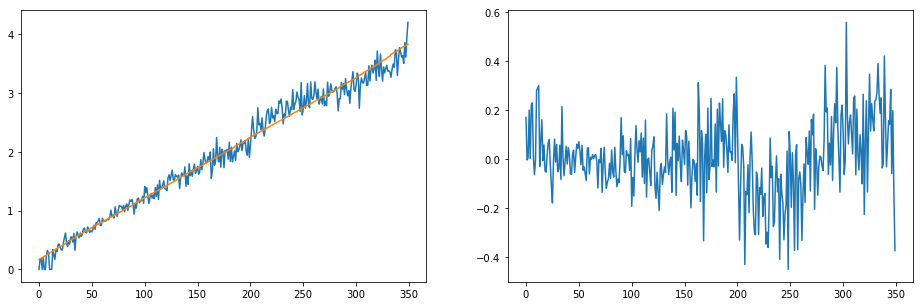

In [65]:
model.eval()
with torch.no_grad():
    x_train = x_train.cuda()
    predict = model(x_train)
predict = predict.cpu()
plt.close("all")
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(predict)
plt.plot(y_train)
plt.subplot(122)
plt.plot((y_train-predict))
# a = train_df["temperature"].values
# plt.plot(a[:350]-0.5)
plt.show()

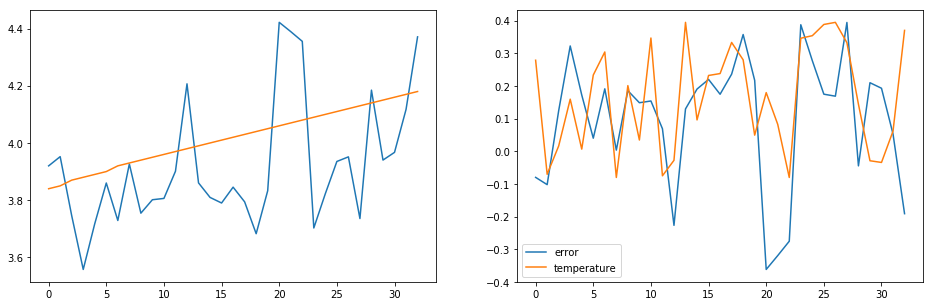

In [66]:
model.eval()
with torch.no_grad():
    x_test = x_test.cuda()
    predict = model(x_test)
predict = predict.cpu()
y_test = y_test.cpu()
plt.close("all")
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(predict)
plt.plot(y_test)
plt.subplot(122)
plt.plot((y_test-predict),label = "error")
a = train_df["temperature"].values
plt.plot(a[350:]-0.5,label = "temperature")
plt.legend()
plt.show()

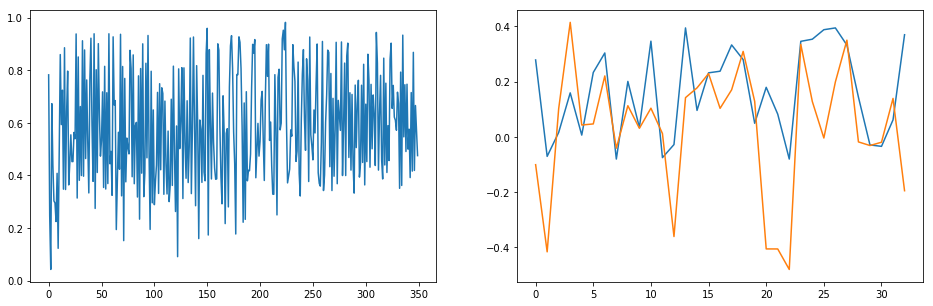

In [29]:
a = train_df["temperature"].values
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(a[:350])
plt.subplot(122)
plt.plot(a[350:]-0.5)
plt.plot((y_test-predict))